In [9]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [10]:
filename = '/content/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

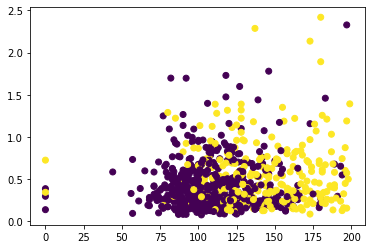

In [12]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['plas'],dataframe['pedi'],c=dataframe['class']) 
#try plot with other features as well mass and pedi

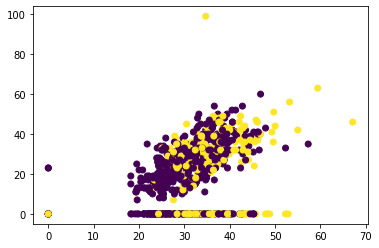

In [13]:
plt.scatter(dataframe['mass'],dataframe['skin'],c=dataframe['class']) 

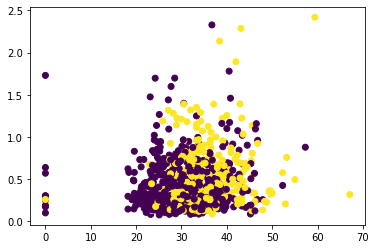

In [14]:
plt.scatter(dataframe['mass'],dataframe['pedi'],c=dataframe['class']) 

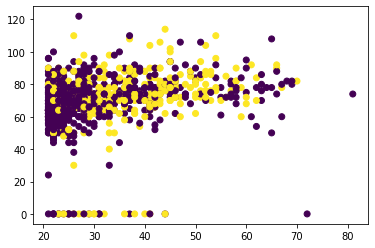

In [15]:
plt.scatter(dataframe['age'],dataframe['pres'],c=dataframe['class']) 

In [16]:
clf = SVC(kernel='rbf',gamma=0.0001)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy= ",acc)
confusion_matrix(y_test,y_pred)

Accuracy=  73.59307359307358


array([[131,  17],
       [ 44,  39]])

In [17]:
((131+39)/(131+17+44+39))*100

73.59307359307358

### Grid Search CV

In [18]:
# to get optimal value of gamma use grid search cv
clf = SVC()
# can put ['linear','rbf','poly'], give range for gamma i.e. C as a regularization parameter. Best out of it will be selected by algorithm. rbf-radial basis function
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.0001],'C':[1,15,14,13,12,11,10,0.1] }] # 6 X 8 =48 models will be created and will give best out of it.
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.0001],
                          'kernel': ['rbf']}])

In [20]:
gsv.best_params_ , gsv.best_score_ # 73% accuracy

({'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.7506289308176101)

In [21]:
clf = SVC(C=1,gamma=0.0001,kernel='rbf') # can change kernel and check accuracy
clf.fit(X_train , y_train) #build model
y_pred = clf.predict(X_test)#predict on test dataset
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.59307359307358


array([[131,  17],
       [ 44,  39]])

In [ ]:
#(137+45)/(137+45+36+13) # accuracy by confusion matrix

0.7878787878787878